# Kashif Ali
# 20P-0648

Libraries required

In [ ]:
# !pip install pycryptodome    # first install this library

**Importing libraries**

In [ ]:
import time                                             # used for measuring the execution time of each encryption algorithm
from Crypto.Cipher import DES, AES, PKCS1_OAEP          # from PyCryptodome library we are importing specific encryption algorithms (DES, AES)
from Crypto.PublicKey import RSA                        # imports the RSA encryption and decryption
from Crypto.Util import Padding             #   This module is used to apply padding to the data for Block Size Alignment: on fixed-size blocks of data (e.g., 64 bits for DES or 128 bits for AES).

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/input_files/50mb.txt'                               # try 10mb.txt, 50mb.txt
output_path = '/content/drive/MyDrive/Colab Notebooks/output_files/rsa_encrypted.txt'
output_decrypted = '/content/drive/MyDrive/Colab Notebooks/output_files/rsa_decrypted.txt'

# files for des
des_enc = '/content/drive/MyDrive/Colab Notebooks/output_files/des_encrypted.txt'
des_dec = '/content/drive/MyDrive/Colab Notebooks/output_files/des_decrypted.txt'

# files for aes
aes_enc = '/content/drive/MyDrive/Colab Notebooks/output_files/aes_encrypted.txt'
aes_dec = '/content/drive/MyDrive/Colab Notebooks/output_files/aes_decrypted.txt'

# storing timing
algo_time = '/content/drive/MyDrive/Colab Notebooks/algo_times/50mb_timing.txt'

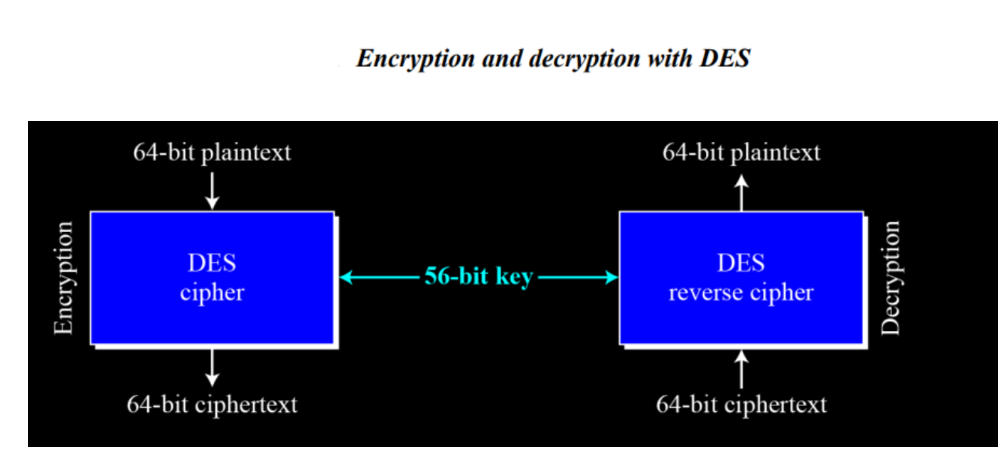

code defines a function for DES encryption and decryption using ECB mode with padding. It uses the PyCryptodome library's DES implementation. While this code demonstrates the basic usage of DES encryption and decryption

In [ ]:
# Function to encrypt and decrypt data using DES
def des_encrypt_decrypt(data, key):
    cipher = DES.new(key, DES.MODE_ECB)
    encrypted_data = cipher.encrypt(Padding.pad(data, 8))
    decrypted_data = Padding.unpad(cipher.decrypt(encrypted_data), 8)
    return encrypted_data, decrypted_data

# function that takes two parameters data(for encryption and decryption) and the key (encry/decry for DES)
# than we are creating a DES cipher object using DES.new method it takes the key and the encryption mode we are using ECB
# the data is padded to a multiple of 8 bytes with padding before encryption to match the block size, allowing for proper block-wise encryption.
# same with decryption
# returns the tuple containing the encrypted and decrypted data

**AES(Advanced Encryption Standard)**

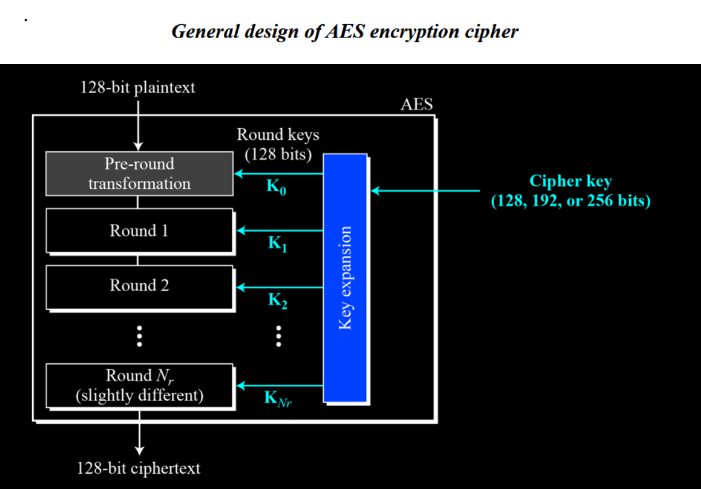

In [ ]:
# Function to encrypt and decrypt data using AES in CBC mode
def aes_encrypt_decrypt(data, key):
    iv = b'1234567890123456'                       # using 128 bit key although we can use 192, or 256
    encrypt_cipher = AES.new(key, AES.MODE_CBC, iv)
    encrypted_data = encrypt_cipher.encrypt(Padding.pad(data, 16))

    # For decryption, create a new cipher object with the same key and IV
    decrypt_cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = Padding.unpad(decrypt_cipher.decrypt(encrypted_data), 16)

    return encrypted_data, decrypted_data

# the above function will take data(for encrypt and decrypt) and the key(used for encryption and decryption)
# and than it takes 128 bit key and encrypt the data with 10 rounds of 128 bit plain text

In [ ]:
# Read data from a file

with open(file_path, 'rb') as file:
    data = file.read()

# Measure time for DES encryption and decryption
start_time = time.time()
des_key = b'8bytekey'  # Replace with your 8-byte DES key
des_encrypted, des_decrypted = des_encrypt_decrypt(data, des_key)
des_time = time.time() - start_time

# Measure time for AES encryption and decryption
start_time = time.time()
aes_key = b'16bytekey1234567'  # Replace with your 16-byte AES key
aes_encrypted, aes_decrypted = aes_encrypt_decrypt(data, aes_key)
aes_time = time.time() - start_time



# Write the results to files
with open(des_enc, 'wb') as des_encrypted_file:
    des_encrypted_file.write(des_encrypted)
with open(des_dec, 'wb') as des_decrypted_file:
    des_decrypted_file.write(des_decrypted)

with open(aes_enc, 'wb') as aes_encrypted_file:
    aes_encrypted_file.write(aes_encrypted)
with open(aes_dec, 'wb') as aes_decrypted_file:
    aes_decrypted_file.write(aes_decrypted)

# Write timing measurements to a file
with open(algo_time, 'w') as timing_file:
    timing_file.write(f"DES Time: {des_time:.6f} seconds\n")
    timing_file.write(f"AES Time: {aes_time:.6f} seconds\n")

**RSA(Rivest, Shamir, Adleman)**

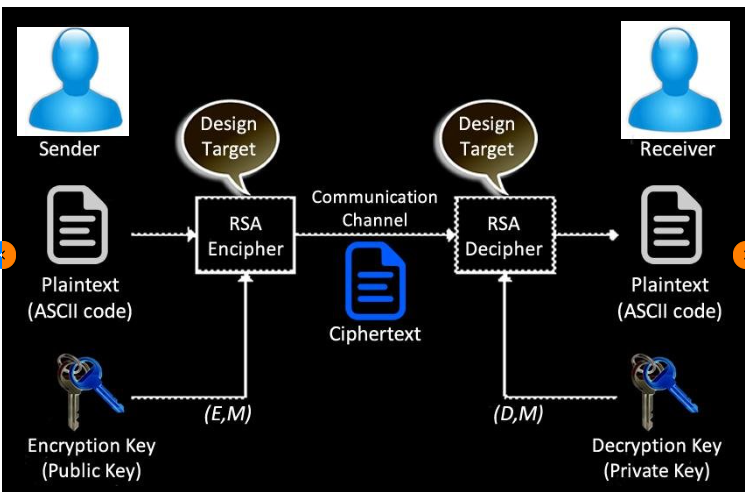

In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP

def generate_rsa_keys(key_size):
    """Generates a public and private RSA key pair.

    Args:
        key_size: The size of the key in bits.

    Returns:
        A tuple containing the public and private keys.
    """
    key = RSA.generate(key_size)
    public_key = key.publickey()
    return public_key, key

def encrypt_file_with_rsa(file_path, public_key, output_file_path):
    """Encrypts a file using the RSA algorithm.

    Args:
        file_path: The path to the file to be encrypted.
        public_key: The public RSA key to encrypt the file with.
        output_file_path: The path to the output encrypted file.
    """
    cipher_rsa = PKCS1_OAEP.new(public_key)

    with open(file_path, "rb") as input_file, open(output_file_path, "wb") as output_file:
        while True:
            data = input_file.read(128)
            if not data:
                break

            encrypted_data = cipher_rsa.encrypt(data)
            output_file.write(encrypted_data)

def decrypt_file_with_rsa(file_path, private_key, output_file_path):
    """Decrypts a file using the RSA algorithm.

    Args:
        file_path: The path to the file to be decrypted.
        private_key: The private RSA key to decrypt the file with.
        output_file_path: The path to the output decrypted file.
    """
    cipher_rsa = PKCS1_OAEP.new(private_key)

    with open(file_path, "rb") as input_file, open(output_file_path, "wb") as output_file:
        while True:
            encrypted_data = input_file.read(private_key.size_in_bytes())
            if not encrypted_data:
                break

            decrypted_data = cipher_rsa.decrypt(encrypted_data)
            output_file.write(decrypted_data)


In [ ]:
# Example usage:

# Generate RSA keys
start_time = time.time()


public_key, private_key = generate_rsa_keys(2048)

# File paths
output_encrypted = output_path
output_decrypted = output_decrypted

# Encrypt a file
encrypt_file_with_rsa(file_path, public_key, output_encrypted)

# Decrypt a file
decrypt_file_with_rsa(output_encrypted, private_key, output_decrypted)



rsa_time = time.time() - start_time

with open(algo_time, 'a') as timing_file:
    timing_file.write(f"RSA Time: {rsa_time:.6f} seconds\n")